In [1]:
'''
Using this project, we have a netflix data we'll clean it preprocess and will be pointing out the following points
1 - Most frequent genre of movies released on Netflix?
2 - Genre with highest votes?
3 - Movie with highest popularity, and its genre?
4 - Movie with lowest popularity, and its genre?
5 - Year with most filmmed movies?
'''

"\nUsing this project, we have a netflix data we'll clean it preprocess and will be pointing out the following points\n1 - Most frequent genre of movies released on Netflix?\n2 - Genre with highest votes?\n3 - Movie with highest popularity, and its genre?\n4 - Movie with lowest popularity, and its genre?\n5 - Year with most filmmed movies?\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("mymoviedb.csv", lineterminator ="\n")

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [7]:
#checking if there's any duplicated data
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [9]:
#Changing release-date data type to date time format 
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [10]:
# Removed the whole date form release date and have just kept the year only
df['Release_Date'] = pd.to_datetime(df['Release_Date']).dt.year

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
#Removing the overview poster_url and original_language
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [13]:
df.drop(cols,axis=1, inplace=True)

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [15]:
#Putting labels on movies based on their vote_avg 
# labels are popular, average, below_average, not popular

In [16]:
def categorize_col(df, col, labels):
    # Correcting the typo in describe()
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    # Using pd.cut to categorize the column
    df[col] = pd.cut(df[col], edges, labels=labels, include_lowest=True)
    return df

In [17]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)

# Checking unique values in the Vote_Average column
print(df['Vote_Average'].unique())

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [19]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [20]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [21]:
#Breaking the Genre into differnet columns or we can say list

df['Genre'] = df['Genre'].str.split(', ')

# Exploding the Genre column into separate rows
df = df.explode('Genre').reset_index(drop=True)



In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [23]:
#Casting column into category
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [25]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [26]:

sns.set_style('whitegrid')

In [27]:
# Solving Point number 1 
# Most frequent genre of movies released on Netflix
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

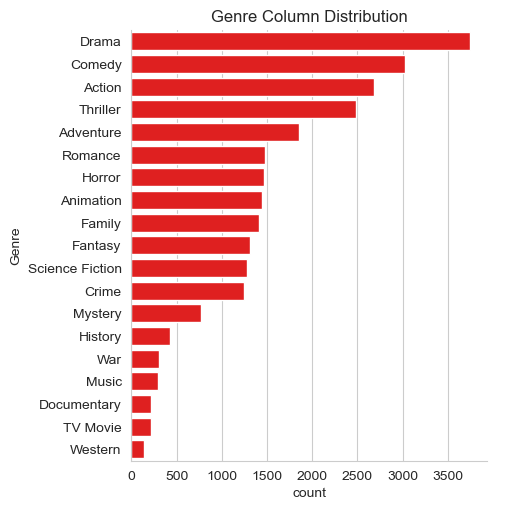

In [28]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='Red')
plt.title("Genre Column Distribution")
plt.show()

In [29]:
# Solving Point Number 2 
# Highest vote in vote-avg column

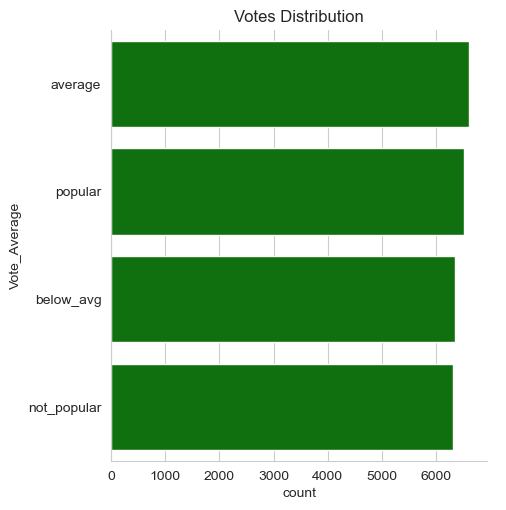

In [33]:
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index, color='green')

# Set the title of the plot
plt.title("Votes Distribution")

# Show the plot
plt.show()

In [34]:
# Point Number 3 
# Movie with the highest popularity and its genre


In [35]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [36]:
# Point Number 4 
# Movie with the lowest popularity and its genre

In [37]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


In [38]:
# Point Number 5 
# Year with most filmmed movies

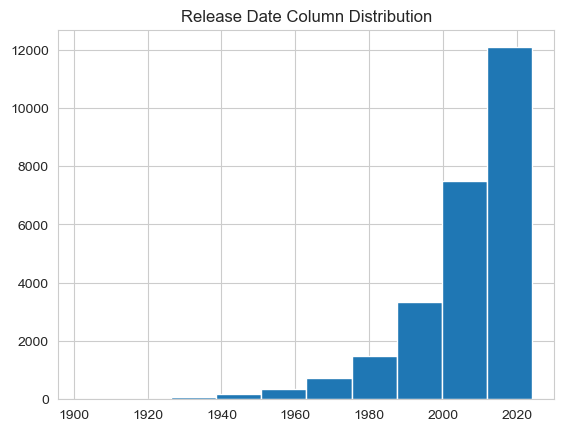

In [41]:
df['Release_Date'].hist()
plt.title("Release Date Column Distribution")
plt.show()